In [1]:

#https://medium.com/@shsu14/introduction-to-data-science-custom-twitter-word-clouds-704ec5538f46
import numpy as np
import matplotlib.pyplot as plt
import re
from twython import Twython
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
from IPython.display import Image as im

In [2]:
APP_KEY = "xxxxx"
APP_SECRET = 'xxxxxx'
twitter = Twython(APP_KEY, APP_SECRET)

In [63]:
#LulaOficial
#CarlosBolsonaro
#opropriolavo
#PastorMalafaia
#pabllovittar
#Get timeline 
user_timeline=twitter.get_user_timeline(screen_name='realdonaldtrump',count=1) 
#get most recent id
last_id = user_timeline[0]['id']-1
for i in range(16):
    batch = twitter.get_user_timeline(screen_name='realdonaldtrump',count=400, max_id=last_id)
    user_timeline.extend(batch)
    last_id = user_timeline[-1]['id'] - 1

In [76]:
user_timeline[0]['retweeted']
len(user_timeline)

2397

In [70]:
#Extract textfields from tweets
raw_tweets = []
for tweets in user_timeline:
    raw_tweets.append(tweets['text'])

### English words

In [38]:
raw_string = ''.join(raw_tweets)
no_links = re.sub(r'http\S+', '', raw_string)
no_unicode = re.sub(r"\\[a-z][a-z]?[0-9]+", '', no_links)
no_special_characters = re.sub('[^A-Za-z ]+', '', no_unicode)

STOPWORDS.add("realdonaldtrump")
STOPWORDS.add("will")
words = no_special_characters.split(" ")
words = [w for w in words if len(w) > 2]  # ignore a, an, be, ...
words = [w.lower() for w in words]
words = [w for w in words if w not in STOPWORDS]

### Portuguese - For tweets in Brazilian portuguese 

In [88]:
import unicodedata

def removeSpecialCharacter(text):

    # Unicode normalize transforma um caracter em seu equivalente em latin.
    nfkd = unicodedata.normalize('NFKD', text)
    plainText = u"".join([c for c in nfkd if not unicodedata.combining(c)])

    # Usa expressão regular para retornar a palavra apenas com números, letras e espaço
    return re.sub('[^a-zA-Z0-9 \\\]', '', plainText)

#Create a string form of our list of text
raw_string = ''.join(raw_tweets)
no_links = re.sub(r'http\S+', '', raw_string)

words = no_links.split(" ")
words = [w for w in words if len(w) > 2]  # ignore a, an, be, ...
words = [w.lower() for w in words]
words = [removeSpecialCharacter(w) for w in words]

brazillian_words = []
with open("stopwords.txt", 'r') as f:
    [brazillian_words.append(word) for line in f for word in line.split()]

words = [w for w in words if w not in brazillian_words]

### plot

In [18]:
mask = np.array(Image.open('MAGA.png'))

In [39]:
#wc = WordCloud(background_color="white", max_words=100, mask=mask)
wc = WordCloud(background_color="white", max_words=100)
clean_string = ','.join(words)
wc.generate(clean_string)

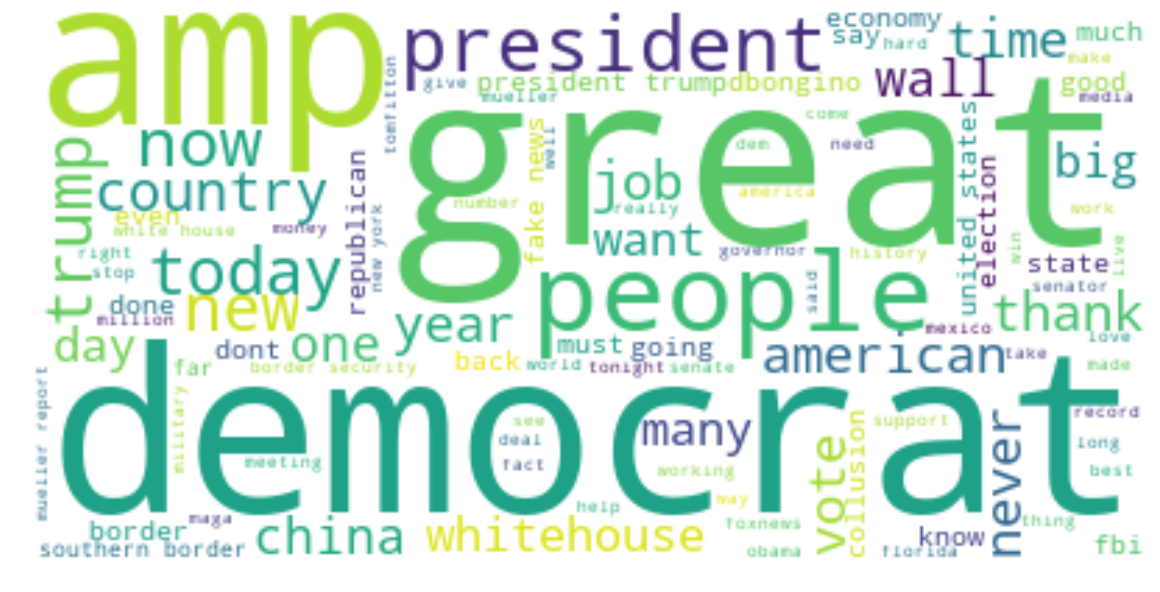

In [41]:
f = plt.figure(figsize=(20,20))
f.add_subplot(1,1, 1)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()


# Sentiment Analysis

In [42]:
import re 
import tweepy 
from tweepy import OAuthHandler 
from textblob import TextBlob 

In [43]:
# keys and tokens from the Twitter Dev Console 
consumer_key = 'xxxxxxxxxxxxxxxx'
consumer_secret = 'xxxxxxxxxxxxxxxxxxx'
access_token = 'xxxxxxxxxxxxxxx'
access_token_secret = 'Uxxxx'

# attempt authentication 
try: 
    # create OAuthHandler object 
    auth = OAuthHandler(consumer_key, consumer_secret) 
        # set access token and secret 
    auth.set_access_token(access_token, access_token_secret) 
     # create tweepy API object to fetch tweets 
    api = tweepy.API(auth) 

except: 
    print("Error: Authentication Failed") 

In [44]:
def clean_tweet(tweet): 
    ''' 
    Utility function to clean tweet text by removing links, special characters 
    using simple regex statements. 
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split()) 

def get_tweet_sentiment(tweet): 
    ''' 
    Utility function to classify sentiment of passed tweet 
    using textblob's sentiment method 
    '''
    # create TextBlob object of passed tweet text 
    analysis = TextBlob(clean_tweet(tweet)) 
    # set sentiment 
    if analysis.sentiment.polarity > 0: 
        return 'positive'
    elif analysis.sentiment.polarity == 0: 
        return 'neutral'
    else: 
        return 'negative'

def get_tweets(query, count = 10): 
    ''' 
    Main function to fetch tweets and parse them. 
    '''
    # empty list to store parsed tweets 
    tweets = [] 

    try: 
        # call twitter api to fetch tweets 
        fetched_tweets = api.search(q = query, count = count) 

        # parsing tweets one by one 
        for tweet in fetched_tweets: 
            # empty dictionary to store required params of a tweet 
            parsed_tweet = {} 

            # saving text of tweet 
            parsed_tweet['text'] = tweet.text 
            # saving sentiment of tweet 
            parsed_tweet['sentiment'] = get_tweet_sentiment(tweet.text) 

            # appending parsed tweet to tweets list 
            if tweet.retweet_count > 0: 
                # if tweet has retweets, ensure that it is appended only once 
                if parsed_tweet not in tweets: 
                    tweets.append(parsed_tweet) 
            else: 
                tweets.append(parsed_tweet) 

        # return parsed tweets 
        return tweets 

    except tweepy.TweepError as e: 
        # print error (if any) 
        print("Error : " + str(e)) 



In [ ]:
# calling function to get tweets 
tweets = get_tweets(query = 'Donald Trump', count = 200) 

# picking positive tweets from tweets 
ptweets = [tweet for tweet in tweets if tweet['sentiment'] == 'positive'] 
# percentage of positive tweets 
print("Positive tweets percentage: {} %".format(100*len(ptweets)/len(tweets))) 
# picking negative tweets from tweets 
ntweets = [tweet for tweet in tweets if tweet['sentiment'] == 'negative'] 
# percentage of negative tweets 
print("Negative tweets percentage: {} %".format(100*len(ntweets)/len(tweets))) 
# percentage of neutral tweets 
print("Neutral tweets percentage: {} %".format(100*len(tweets - ntweets - ptweets)/len(tweets))) 

# printing first 5 positive tweets 
print("\n\nPositive tweets:") 
for tweet in ptweets[:10]: 
    print(tweet['text']) 

# printing first 5 negative tweets 
print("\n\nNegative tweets:") 
for tweet in ntweets[:10]: 
    print(tweet['text']) 

In [10]:
tweets[5]


{'text': "RT @poniewozik: Donald Trump insisted The Apprentice was the number one show on TV when it was 72nd in the ratings. I don't think mathemati…",
 'sentiment': 'neutral'}

In [61]:
raw_tweets

[]

In [1]:
#no_links

In [68]:
clean_tweet = []
for tweet in raw_tweets:
    clean_tweet.append(re.sub(r'http\S+', '', tweet))

In [69]:
clean_tweet

[]

In [71]:
raw_tweets[:10]

['Wishing former President Jimmy Carter a speedy recovery from his hip surgery earlier today. He was in such good spi… https://t.co/WNm3vCNWZw',
 'Great to welcome Chairman Shin from Lotte Group to the WH. They just invested $3.1 BILLION into Louisiana-biggest i… https://t.co/pOHo1G6NXt',
 'Today, I officially updated my budget to include $18 million for our GREAT @SpecialOlympics, whose athletes inspire… https://t.co/9glgYVLeT3',
 'We must protect our Great Lakes, keeping them clean and beautiful for future generations. That’s why I am fighting… https://t.co/tqoQ9nwSyR',
 'Under my Administration, we are restoring @NASA to greatness and we are going back to the Moon, then Mars. I am upd… https://t.co/o0IsdgorZr',
 'My Administration will be fighting for $200 million for the Army Corps Everglades restoration work this year. Congr… https://t.co/XTPBS8T6ox',
 'RT @WhiteHouse: This afternoon, President Trump welcomed Prime Minister Viktor Orban of Hungary to the Oval Office. https://t.co/

In [ ]:
raw_tweets = raw_tweets[~raw_tweets["Text"].str.startswith('RT')]